# Make an ESN learn and detect where the features arethethethe


# 1. No W_back, only input
Not recursive, only inputs with arbitrary equations

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Random functions for internal weights
def rand_W_sample(size, cst=0.4, scarcity=0.6):
    probs = [scarcity, (1-scarcity)/2, (1-scarcity)/2]
    Wr = np.random.choice([0, -cst, cst], size=size, replace=True, p=probs)
    try:
        return Wr/max(abs(np.linalg.eigvals(Wr)))
    except:
        print('NORM bc not squared matrix')
        return Wr/np.linalg.norm(Wr)

def rand_W_unif(size, cst=0.4, scarcity=0.6):
    Wr = np.random.sample(size)*2*cst - cst
    mask = np.random.choice([0, 1], size=size, replace=True, p=[scarcity, 1-scarcity])
    Wr = mask*Wr
    return Wr/max(abs(np.linalg.eigvals(Wr)))
    
def rand_W_normal(size, var=1, scarcity=0.6):
    Wr = np.random.normal(0, var, size=size)
    mask = np.random.choice([0, 1], size=size, replace=True, p=[scarcity, 1-scarcity])
    Wr = mask*Wr
    return Wr/max(abs(np.linalg.eigvals(Wr)))


## INPUTS OUPUTS

In [3]:
# Parameters
Tt = 1000

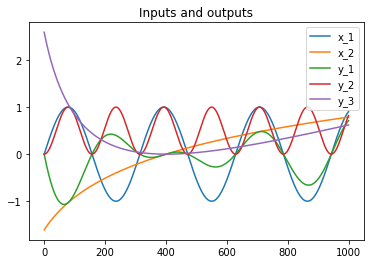

In [4]:
# Inputs
x1_sin_speed = 1/50
x2_log_speed = 1/100
t = np.arange(Tt)
x1 = np.sin(t*x1_sin_speed)
x2 = np.log(t*x2_log_speed +1) - np.log(Tt*x2_log_speed/2)
X = np.vstack((x1, x2))
plt.plot(X.T);

# Outputs
y1 = x1*x2
y2 = x1**2
y3 = x2**2
Y = np.vstack((y1, y2, y3))
plt.plot(Y.T)

x_names = [f'x_{i+1}' for i in range(len(X))]
y_names = [f'y_{i+1}' for i in range(len(Y))]
# Plot
plt.legend(x_names + y_names);
plt.title('Inputs and outputs');

## ESN.1 INIT

In [33]:
# Parametrs
K = len(X)
N = 20
L = len(Y)
Fl, Tr, Si = 200, 400, 300

## Activation functions
f_dr = lambda x: np.tanh(x)
f_out = lambda x: x
inv_f_out = lambda x: x


In [34]:
# Weights
W_in = rand_W_sample((N,K), scarcity=0)

W_back = rand_W_sample((N,L), scarcity=0)*0

r = 0.95
param_rand_W = 0.4
scarcity = 0.9
rand_W = rand_W_sample
W = rand_W((N,N), param_rand_W, scarcity)*r

NORM bc not squared matrix
NORM bc not squared matrix


## ESN.2 SAMPLE

In [39]:
# Sample
io_data = np.array([inv_f_out(d) for d in Y]) # Inverse out data
var_noise = 0.00001 # Variance of random noise
M = np.zeros((Tt, N))
for i in range(1, Fl + Tr):
    noise = np.random.normal(0, var_noise, size=N)
    M[i,:] = f_dr(np.dot(W, M[i-1,:]) + np.dot(W_in, X.T[i-1]) + np.dot(W_back, Y.T[i-1]) + noise)

## ESN.3 LEARN

In [101]:
# Learn
M_tr = M[Fl: Fl + Tr]
Y_tr = Y.T[Fl: Fl + Tr]
gamma = 1/1000
Inv = np.linalg.inv(np.eye(N)*gamma  + np.dot(M_tr.T,M_tr))
pInv = np.dot(M_tr, Inv)
W_out = np.dot(pInv.T, Y_tr)

## DISCOVER FEATURES

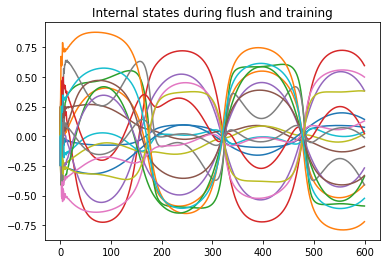

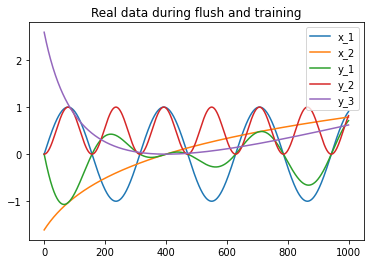

In [102]:
# Plot internal states
plt.plot(M[: Fl + Tr]);
plt.title("Internal states during flush and training");
plt.figure()
plt.plot(X.T);
plt.plot(Y.T)
plt.legend(x_names + y_names)
plt.title("Real data during flush and training");

Text(0.5, 1.0, 'Real and trained data')

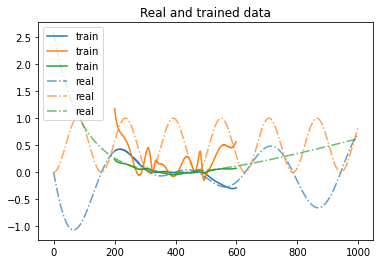

In [103]:
# Plot learned
plot_flush, plot_sim = False, False
begin = 0 if plot_flush else Fl
end = Fl + Tr + (Si if plot_sim else 0)

plt.gca().set_prop_cycle(color=[plt.get_cmap("tab10")(i) for i in range(L)])

    
plt.plot(t[begin:end], np.dot(M[begin:end], W_out), label='train');
plt.plot(t, Y.T, linestyle='-.', alpha=0.7, label='real')
plt.legend(loc='upper left')
plt.title("Real and trained data")

<BarContainer object of 20 artists>

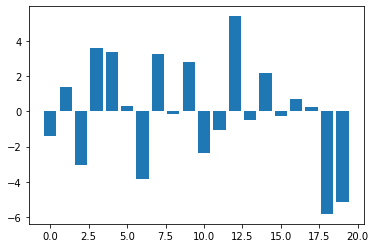

In [105]:
plt.bar(np.arange(N),W_out[:,2])